### 라이브러리 불러오기

In [15]:
# 기본 Libaray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set()
%matplotlib inline

# 성능 측정
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# 그래프 한글 깨짐현상 해결방안
# 폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 랜덤 포레스트

In [3]:
# 랜덤포레스트 라이브러리 부르기
from sklearn.ensemble import RandomForestClassifier

In [4]:
# 임의의 데이터 부르기
df = pd.read_csv('./iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
# 전처리
df['variety'] = df['variety'].map({"Setosa":1, "Versicolor":2, "Virginica":2})

In [6]:
# 독립, 종속 나누기
X = df.iloc[:,[0,1,2,3]]
y = df['variety']

In [7]:
# 훈련용 / 검증용 데이터 분할
def Split_data(X,y,k): # X : 독립변수, y : 종속변수, k : test_size의 크기(0~1 사이값)
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=k, random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = Split_data(X,y,0.3)

In [8]:
# 랜덤포레스트 모델

## 추후 파라미터 설정이 유동적으로 가능할 경우 변경이 필요한 파라미터는 따로 주석에 메모함
### 메모 사항 이외에는 default 값으로 고정 (*추후 변경될 수 있음)
def RF_Model(x_train,x_test,y_train,y_test):
    ### 기본으로 default되어 있는 값
    rf = RandomForestClassifier( 
        n_estimators=100, # 변경할 수 있도록 수정 (intefer)
        criterion='gini', # 변경할 수 있도록 수정 ('gini','entropy')
        max_depth=None, # 변경할 수 있도록 수정 (integer)
        min_samples_split=2, # 변경할 수 있도록 수정 (integer)
        min_samples_leaf=1, # 변경할 수 있도록 수정 (integer)
        min_weight_fraction_leaf=0.0,
        max_features='auto', # 변경할 수 있도록 수정 ('auto','sqrt','log2')
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None, # random_state = 0로 변경
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0.0,
        max_samples=None
    )
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    return rf, rf_pred

In [9]:
rf, rf_pred = RF_Model(x_train,x_test,y_train,y_test)

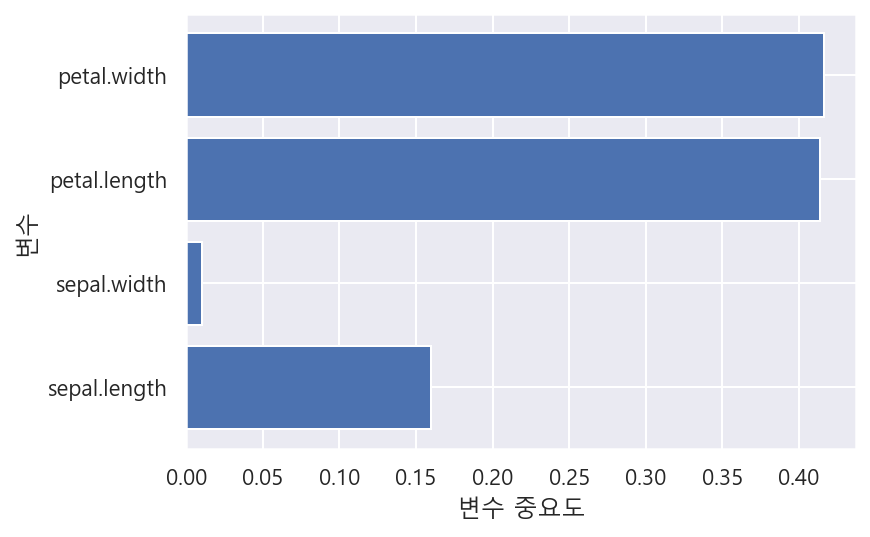

In [10]:
# 변수 중요도 시각화
def plot_feature_importances(model):
    n_features = X.columns
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.yticks(n_features)
    plt.xlabel("변수 중요도")
    plt.ylabel("변수")

plot_feature_importances(rf)

In [17]:
# 분류 평가 matrix 
print("RandomForest Confusion_Matrix\n",confusion_matrix(y_test, rf_pred))
# 분류 정확도
print("RandomForest Accuracy Score :",round(accuracy_score(y_test, rf_pred),5)*100)
print("\n")
# 분류 평가지표
print("RandomForest Classification_Report\n", classification_report(y_test, rf_pred))

RandomForest Confusion_Matrix
 [[16  0]
 [ 0 29]]
RandomForest Accuracy Score : 100.0


RandomForest Classification_Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        29

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 회귀분석

In [3]:
# 필요한 라이브러리 부르기
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [4]:
# 라이브러리 불러오기
# 분석을 위한 임의 데이터로 내장 데이터 부름
from sklearn.datasets import load_boston

boston = load_boston()

In [5]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [10]:
df = pd.concat([dfX, dfy], axis=0)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.6
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.9
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


## 다중회귀분석

- 회귀분석의 경우 종속변수 ~ 독립변수로 예측값을 보는데 종속과 독립을 선택해서 넣을 수 있게 만들 수 있는가?
- 독립변수가 통계적으로 유의하지 않을 경우 제외하고 새로운 분석 모델을 만들어야하기 때문 -> 회귀분석 특징


- AIC를 최소로 만드는 변수선택법이 파이썬에 없어 이 부분을 솔루션에 담기위해선 R을 이용해야함
    - AIC를 최소로 만드는 변수선택법을 이용할 경우 분석에 꼭 사용해야하는 변수가 제거될 수 있으므로 파이썬에서 독립변수 선택으로 정해도 됨

In [7]:
# 상수항 추가
dfX_data = sm.add_constant(dfX, has_constant = "add")

In [8]:
dfX_data

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
dfy

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(dfX_data, dfy, test_size=0.3, random_state=0)

In [18]:
# 모델 만들기
## OLS(종속변수,독립변수)
model = sm.OLS(y_train,x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.76e-98
Time:                        15:36:17   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9371      5.876      6.457      0.000      26.380      49.494
CRIM          -0.1213      0.038     -3.185      0.002      -0.196      -0.046
ZN             0.0445      0.016      2.834      0.005       0.014       0.075
INDUS          0.0113      0.068      0.166      0.868      -0.123       0.146
CHAS           2.5112      1.011      2.483      0.014       0.522       4.501
NOX          -16.2313      4.487     -3.618      0.000     -25.056      -7.406
RM             3.8591      0.491      7.867      0.000       2.894       4.824
AGE           -0.0100      0.016     -0.634      0.527      -0.041       0.021
DIS           -1.5003      0.234     -6.402      0.000      -1.961      -1.039
RAD            0.2421      0.077      3.152      0.002       0.091       0.393
TAX           -0.0111      0.004     -2.586      0.010      -0.019      -0.003
PTRATIO       -1.0178      0.150     -6.803      0.000      -1.312      -0.723
B              0.0068      0.003      2.099      0.037       0.000       0.013
LSTAT         -0.4867      0.060     -8.068      0.000      -0.605      -0.368
==============================================================================
Omnibus:                      133.612   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.086
Skew:                           1.547   Prob(JB):                    2.04e-138
Kurtosis:                       8.781   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# p-value가 커 변수 제거
dfX_data = dfX_data.drop(['INDUS','AGE'], axis=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(dfX_data, dfy, test_size=0.3, random_state=0)

In [21]:
# 모델 만들기
## OLS(종속변수,독립변수)
## DW의 경우 0이면 잔차가 양의 자기 상관을 갖고 4이면 음의 자기 상관을 갖는다.
    # 보통 1.5~ 2.5일 경우 독립으로 판단하고 회귀모형이 적합하다고함.(0 또는 4에 가까울 경우 자기상관을 가지고 있음을 의미함)
model = sm.OLS(y_train,x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          3.40e-100
Time:                        15:36:18   Log-Likelihood:                -1032.4
No. Observations:                 354   AIC:                             2089.
Df Residuals:                     342   BIC:                             2135.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1890      5.824      6.557      0.000      26.733      49.645
CRIM          -0.1208      0.038     -3.183      0.002      -0.195      -0.046
ZN             0.0455      0.015      2.942      0.003       0.015       0.076
CHAS           2.4975      1.003      2.489      0.013       0.524       4.471
NOX          -16.8564      4.119     -4.093      0.000     -24.958      -8.755
RM             3.7875      0.477      7.937      0.000       2.849       4.726
DIS           -1.4634      0.217     -6.754      0.000      -1.890      -1.037
RAD            0.2420      0.073      3.322      0.001       0.099       0.385
TAX           -0.0108      0.004     -2.840      0.005      -0.018      -0.003
PTRATIO       -1.0207      0.147     -6.950      0.000      -1.310      -0.732
B              0.0067      0.003      2.063      0.040       0.000       0.013
LSTAT         -0.4991      0.056     -8.871      0.000      -0.610      -0.388
==============================================================================
Omnibus:                      129.802   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.705
Skew:                           1.516   Prob(JB):                    6.54e-128
Kurtosis:                       8.524   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# 다중공선성 확인
# 상수항을 제하고 10 이상일 경우 제거가 필요함
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,580.541161
1,CRIM,1.714273
2,ZN,2.286849
3,CHAS,1.046580
4,NOX,3.868553
5,RM,1.915304
6,DIS,3.424809
7,RAD,6.811617
8,TAX,7.221181
9,PTRATIO,1.822240


In [23]:
# Coeffiecient Value
result.params

const      38.188982
CRIM       -0.120769
ZN          0.045531
CHAS        2.497513
NOX       -16.856417
RM          3.787462
DIS        -1.463373
RAD         0.241989
TAX        -0.010830
PTRATIO    -1.020736
B           0.006663
LSTAT      -0.499107
dtype: float64

## 회귀식 출력
    ### 회귀식 출력이 필요함
    
    회귀식 (종속변수 = coeffient*독립변수의 합 + 상수)
    - MEDV = 36.341145 - CRIM*0.108413 + ZN*0.045845 + ... - LSTAT*0.522553

# 모델의 검정

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 예측값 출력
y_train_pred = result.predict(x_train)
y_test_pred = result.predict(x_test)

# MSE(Mean Squared eroor) 측정
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE - Train Data: %.2f, Test Data: %.2f' %(mse_train, mse_test))

# 결정 계수 측정
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 - Train Data: %.2f, Test Data: %.2f' %(r2_train, r2_test))

# 측정결과 Train보다 test에서 MSE가 크고 결정계수가 작은것으로 보아 오버피팅되었다고 판단할 수 있고 분석가의 주관에 따라 변경될 수 있다

MSE - Train Data: 19.98, Test Data: 27.05
R2 - Train Data: 0.76, Test Data: 0.68


# 회귀분석 시각화

## 모형의 선형성

- 모든 예측값이 가운데 점선에 맞추어 잔차가 비슷하게 있어야 함.
- 빨간 실선은 잔차의 추세를 나타냄
- 빨간 실선이 점선에서 크게 벗어나면 잔차가 크게 달라진다는 것으로 선형성이 없다는 것

In [36]:
import matplotlib.pyplot as plt
import seaborn

In [64]:
y_pred = result.predict(x_train)
residual = y_train['MEDV']- y_pred

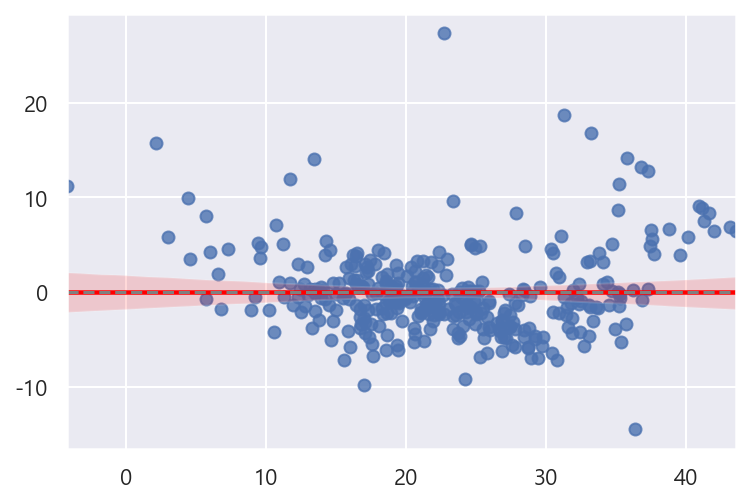

In [66]:
sns.regplot(y_pred, residual, line_kws={'color':'red'})
plt.plot([y_pred.min(), y_pred.max()], [0,0], '--', color='grey')

## 잔차의 정규성 (Q-Q plot)
- 잔차가 정규분포를 띄면 Q-Q plot에서 점들이 점선에 배치되어 있어야 함

In [67]:
import scipy.stats
y_pred = result.predict(x_train)
residual = y_train['MEDV']- y_pred

sr = scipy.stats.zscore(residual)

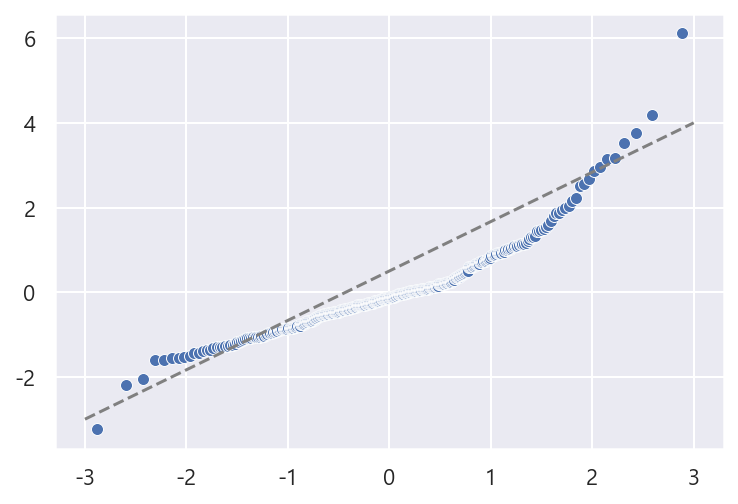

In [72]:
(x,y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3], [-3,4], '--', color='grey')

In [74]:
# 샤피로 검정
    # 샤피로 검정을 통해 정규분포를 정의할 수 있음. p-value가 0.05보다 작을경우 귀무가설을 기각하여 정규분포를 따른다고 할 수 없음
    # 위의 경우 정규분포가 아님
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9024053812026978, pvalue=2.581218218496422e-14)

## 잔차의 등분산성

- 회귀분석을 통해 예측된 값이 크던 작던 모든 값들에 대해 잔차의 분산이 동일하다는 가정
- 빨간색 실선이 수평선을 그리는 것이 이상적

<AxesSubplot:>

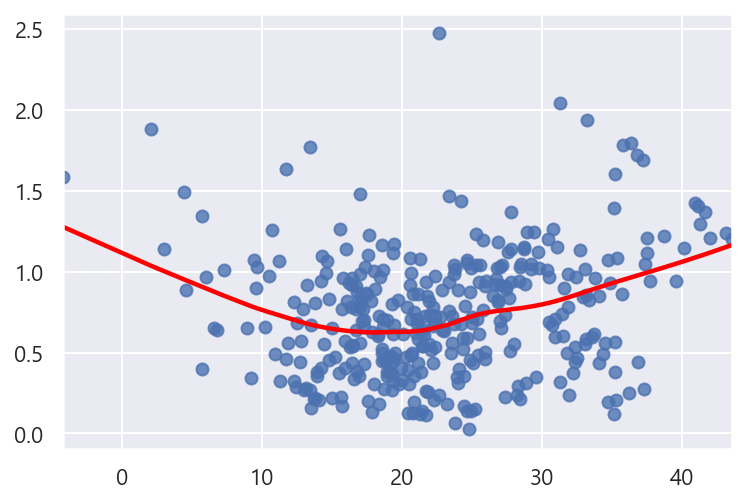

In [75]:
import numpy as np
sns.regplot(y_pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

## 잔차의 독립성
- random sampling의 경우 잔차의 독립성이 만족하는것으로 봄
- 독립성을 담보할 수 없을 경우 더빗왓슴 검정 통계량 확인 1.5-2.5일 경우 독립이라 판단

### 극단값
#### Cook's distance

In [32]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [76]:
cd, _ = OLSInfluence(result).cooks_distance
cd.sort_values(ascending=False).head() # 368번의 경우 많이 벗어나있는것을 알 수 있다.
# 극단값을 지우고 다시 분석을 진행할 수 있도록 WorkFlow가 짜여야 함

368    0.302151
365    0.150711
369    0.115482
364    0.112728
412    0.100237
dtype: float64

## 잔차 분석

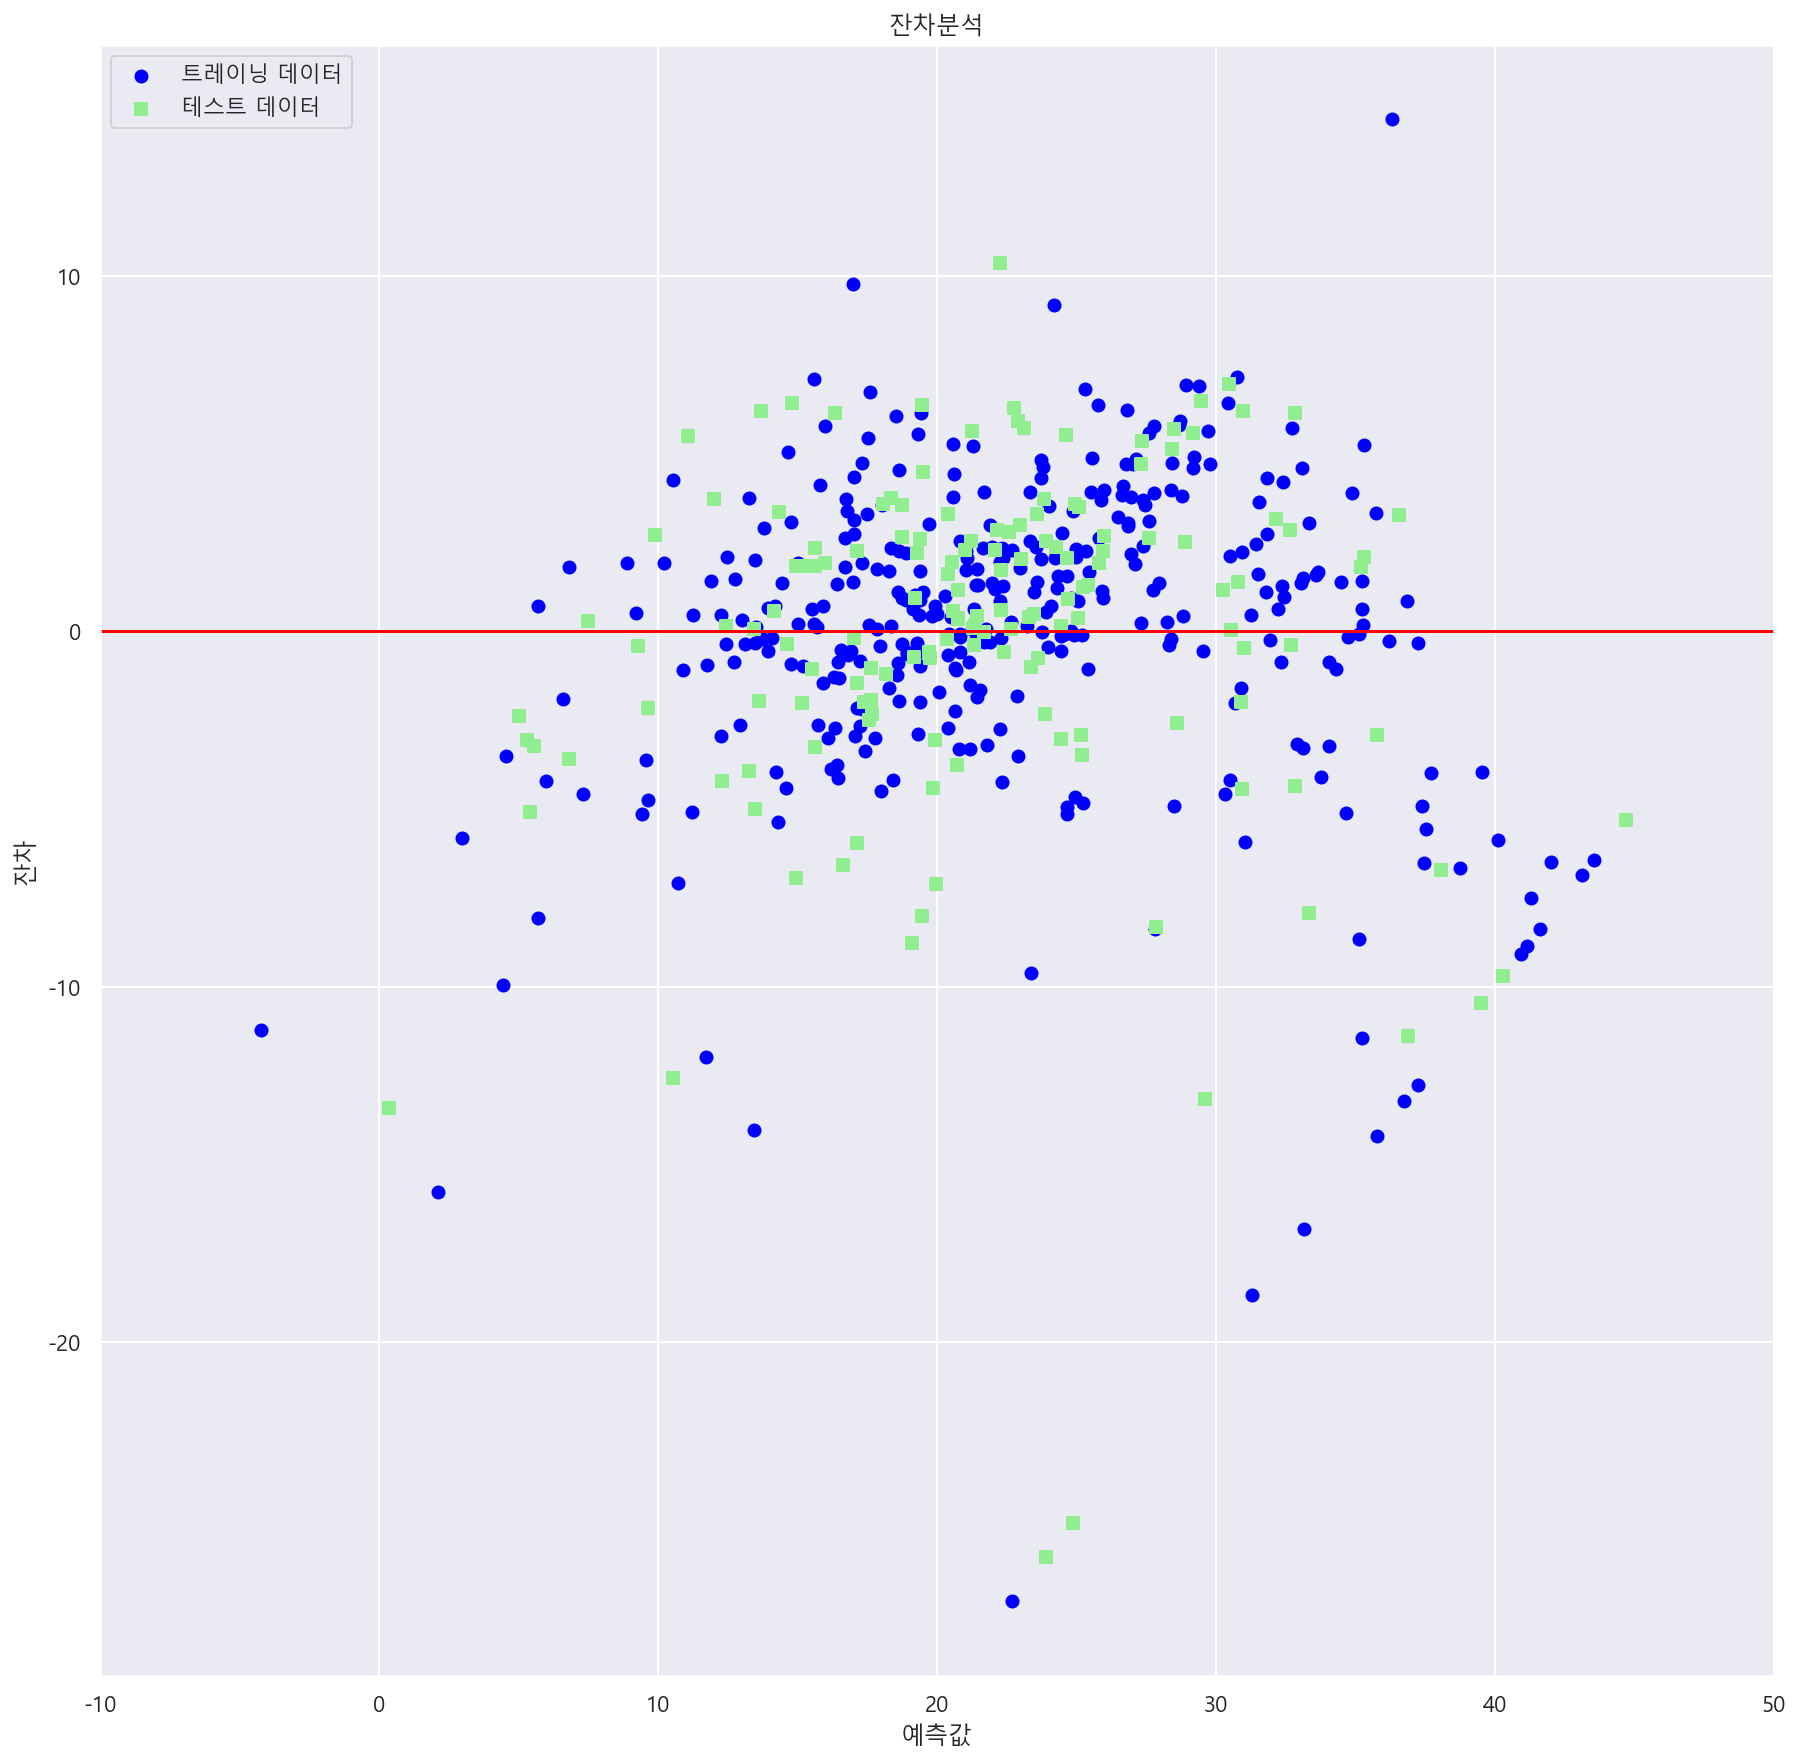

In [89]:
y_train_pred = result.predict(x_train)
y_test_pred = result.predict(x_test)

plt.figure(figsize=(15,15))
plt.scatter(y_train_pred, y_train_pred-y_train['MEDV'], c = 'blue', marker='o', label='트레이닝 데이터')
plt.scatter(y_test_pred, y_test_pred-y_test['MEDV'], c = 'lightgreen', marker='s', label='테스트 데이터')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0, xmin= -10, xmax = 50,color='red')
plt.xlim([-10,50])
plt.title("잔차분석")
plt.legend(loc=2)
plt.show()

## 모델의 Scatter

Text(0, 0.5, '예측 값')

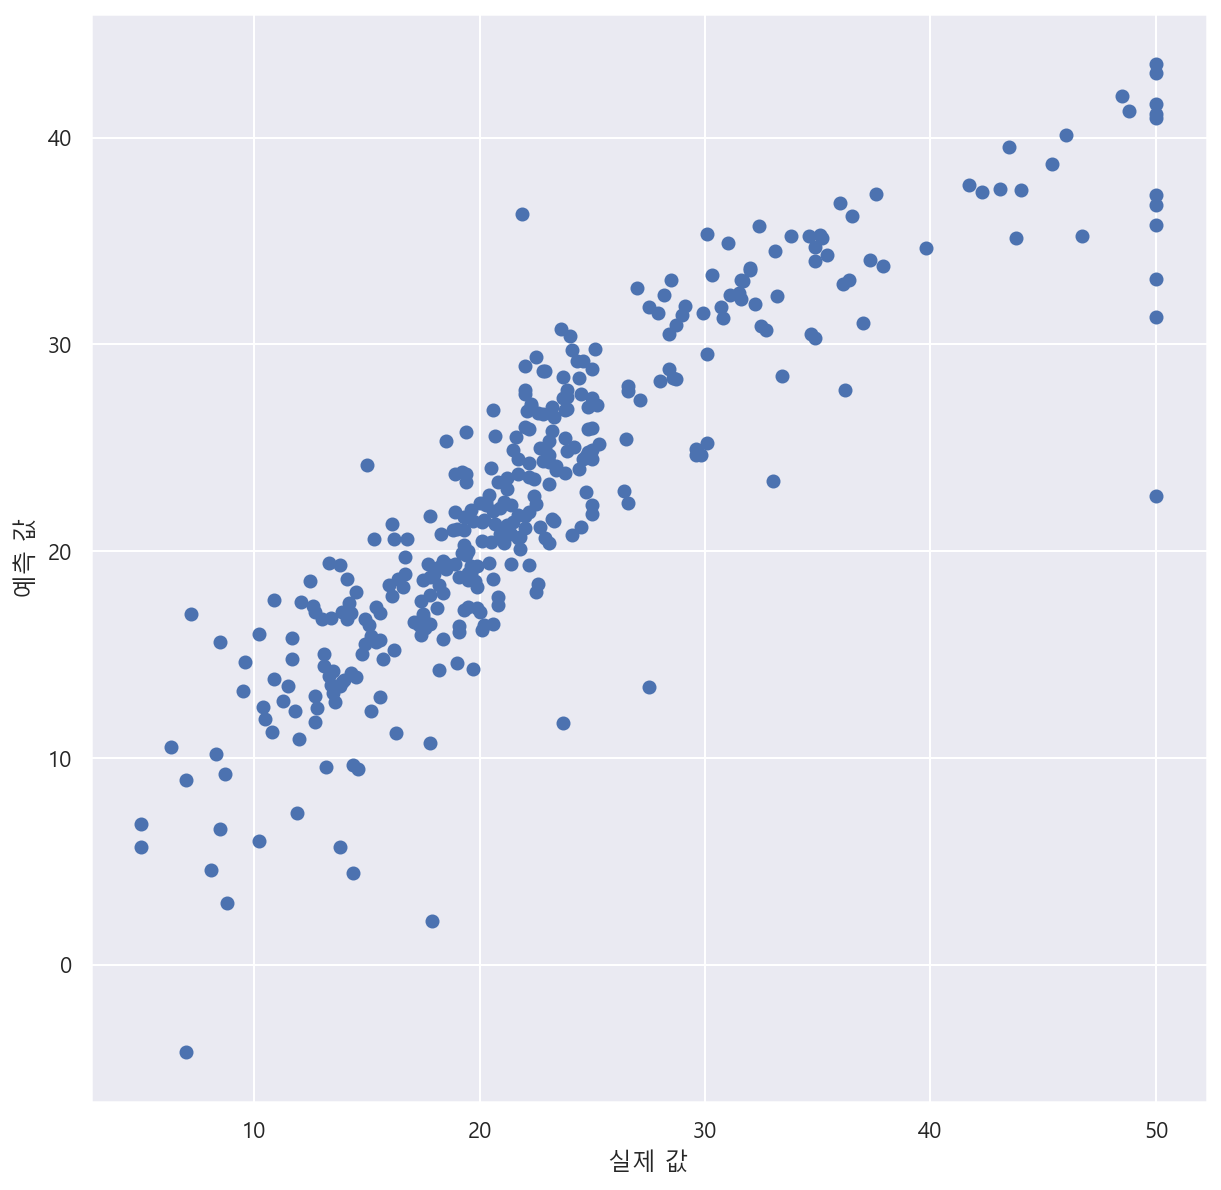

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_pred)
plt.xlabel('실제 값')
plt.ylabel('예측 값')